# Introduction

## Project Overview

Customer churn analysis focuses on understanding the characteristics and behaviors of customers who are likely to cancel or not renew their subscriptions. By identifying the factors that increase the likelihood of churn, businesses can devise targeted strategies to improve customer retention and the bottom line.

In this project, we will look into the data of a telecom company to uncover patterns and predictors of churn. The telecom sector is notorious for high customer churn rates due to high competition and low switching costs for consumers. Our goal is to build a predictive model that can accurately identify customers at high risk of churning, so that approriate action can be taken. 

## Dataset Overview

For this project, I will be using the Orange Telecom's Churn Dataset to predict customer churn. The dataset contains customer activity and a churn label that indicates whether a customer canceled their subscription. Two datasets are available: churn-80 and churn-20. Both datasets originate from the same batch and were pre-split using an 80/20 ratio. 


# Initial Analysis

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from pandas.plotting import table 


# Suppress warnings about changes in future versions
warnings.filterwarnings('ignore', category=FutureWarning)
# Use ggplot style for better graphs
plt.style.use('ggplot')
# Set default plot palette
sns.set_palette('colorblind')

In [8]:
# Read in datasets
df_train = pd.read_csv('../data/churn-bigml-80.csv')
df_test = pd.read_csv('../data/churn-bigml-20.csv')


In [9]:
# Overview of datasets
print(df_train.shape)
print(df_test.shape)


(2666, 20)
(667, 20)


In [10]:
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
df_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
df_train.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

## Initial Observations of Numeric Columns:

- Account length: Average account length is about 101 days, with a standard deviation of approximately 39.6 days. The range is wide, from 1 to 243 days.
- Area code: The area codes are limited to three values (408, 415, and 510), indicating they are of a categorical nature, despite initially being imported as numeric.
- Number vmail messages: On average, customers have about 8 voicemail messages, but the standard deviation is quite high (13.6), indicating a wide distribution. The maximum number of voicemail messages is 50.
- Total Day, Evening, Night, and International - Minutes and Calls: 
    - Total minutes and total calls (Day, Evening, Night, and International): These columns show the total minutes and number of calls made during different times of the day. The average, standard deviation, minimum, and maximum values vary for each period, which may provide insights into customer usage patterns.
    - Total Charges (Day, Evening, Night, and International): These columns indicate the charges incurred. They show a similar distribution pattern to the minutes columns.
- Customer Service Calls: Customers make an average of 1.56 service calls, with a standard deviation of 1.31. The maximum number of customer service calls made by a customer is 9.


In [14]:
df_train.describe(include=['O'])

,State,International plan,Voice mail plan
count,2666,2666,2666
unique,51,2,2
top,WV,No,No
freq,88,2396,1933


## Inital Observations of Categorical Columns

- State: The dataset includes customers from various states, with the number of customers from each state varying. The highest representation is from the state of WV (West Virginia) with 88 customers, and the lowest from CA (California) with 24 customers.
- International Plan: The majority of customers do not have an international plan (2396 out of 2666), whereas 270 customers do.
- Voice Mail Plan: 1933 customers do not have a voice mail plan, whereas 733 customers do.

### Update Column names

In [17]:
# Change all column names to lowercase and add '_' between words - change to snake-case
df_train.columns = [col.lower().replace(' ', '_') for col in df_train.columns]
df_test.columns = [col.lower().replace(' ', '_') for col in df_test.columns]


In [18]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Missing and Duplicate Values

In [20]:
# Check for missing data
df_train.isna().sum()


state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

There are no missing values in the dataset.

In [22]:
# Check for duplicates
df_train.duplicated().sum()

0

There are no duplicate values.

# Exploratory Data Analysis (EDA)


## Univariate Analysis

### Distribution of Target Variable

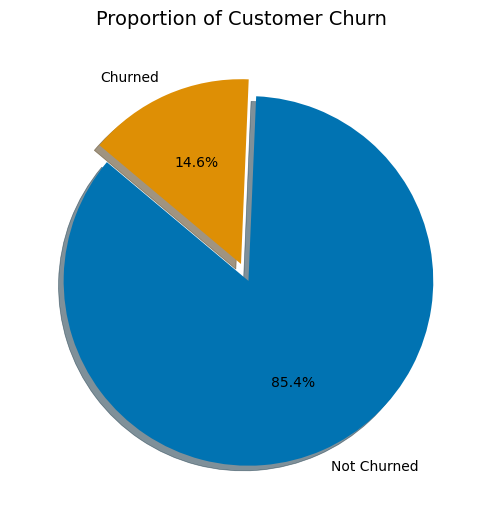

In [27]:
churn_counts = df_train['churn'].value_counts()

# Rename index for clarity
churn_counts.index = ['Not Churned' if status == 0 else 'Churned' for status in churn_counts.index]

# Create a pie chart to visualize the proportion of churn
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, explode=(0.1, 0), shadow=True)
plt.title('Proportion of Customer Churn', fontsize=14)
plt.show()




**Distribution of churn**

Churned customers represent only 14.55% of the data.  Such an inbalance in the target variable can create problems in model training and evaluation.  Different strategies and models may be necessary for handling the imbalanced dataset and will be addressed in the modeling section.


### Numeric Columns

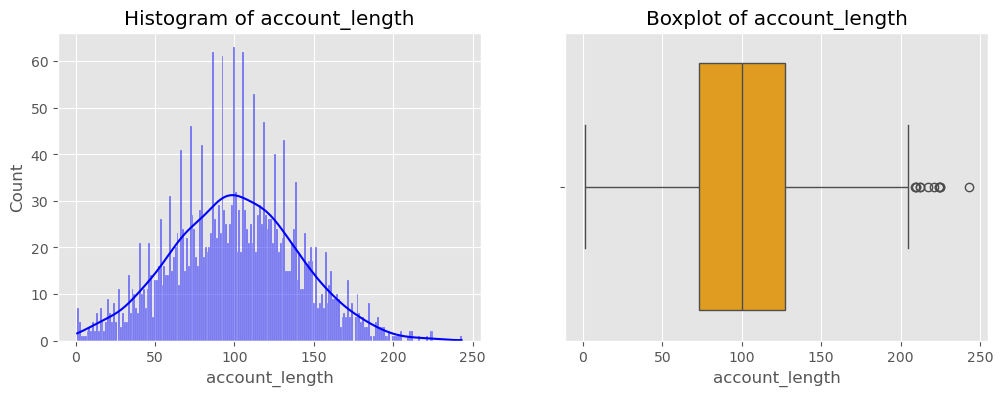

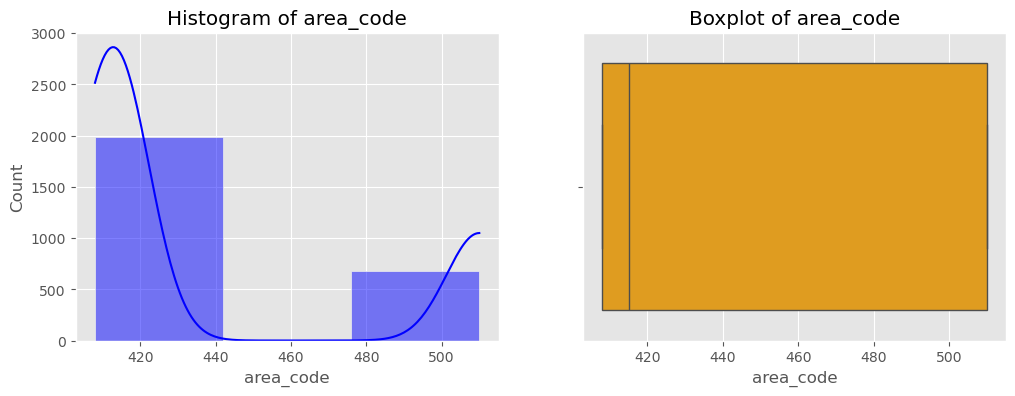

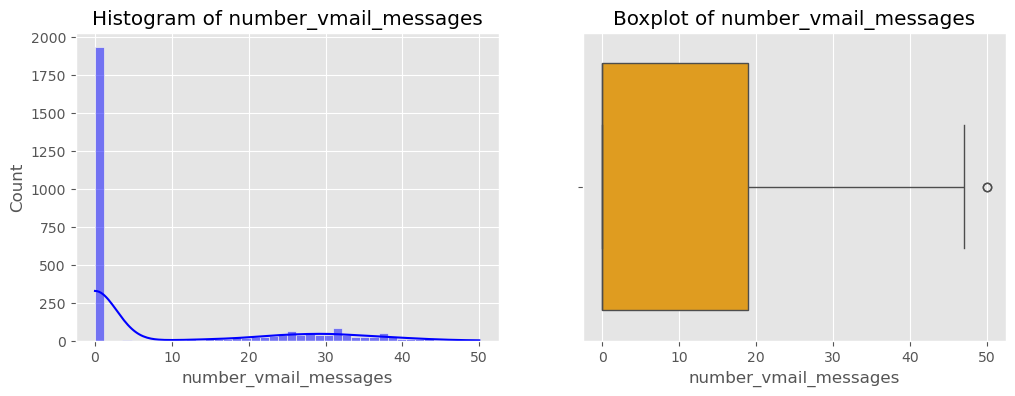

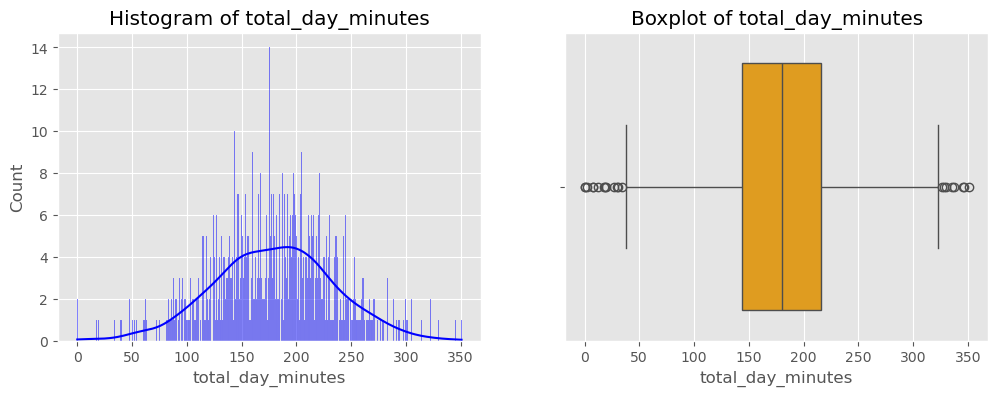

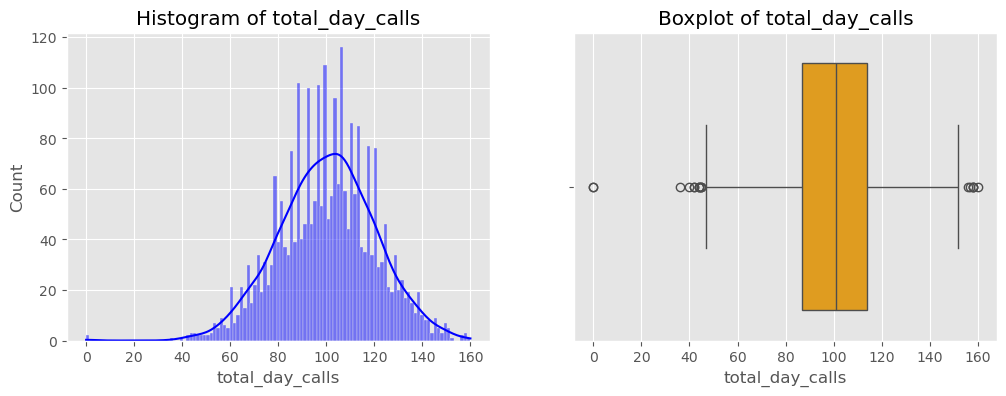

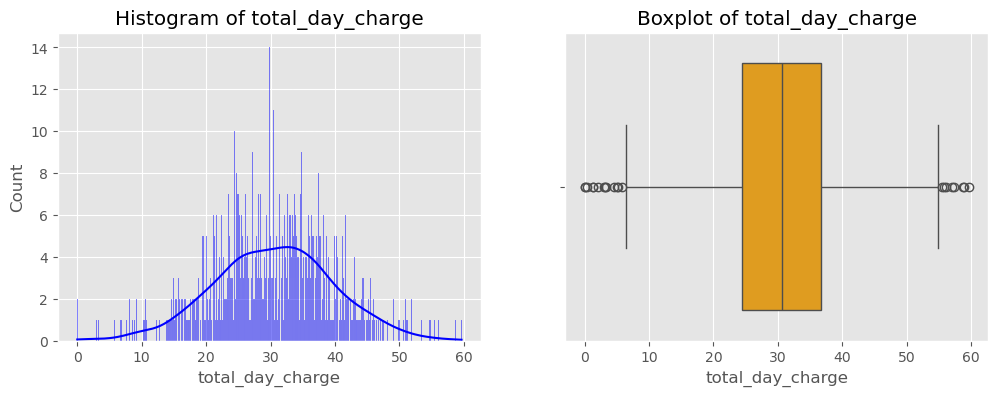

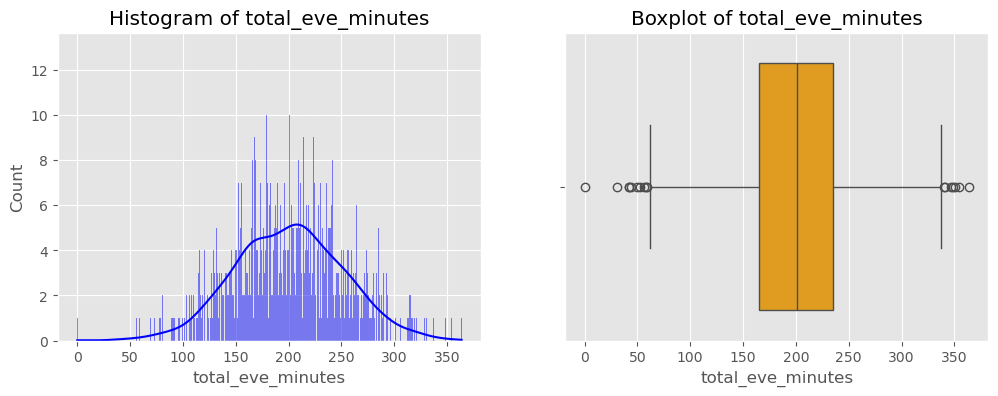

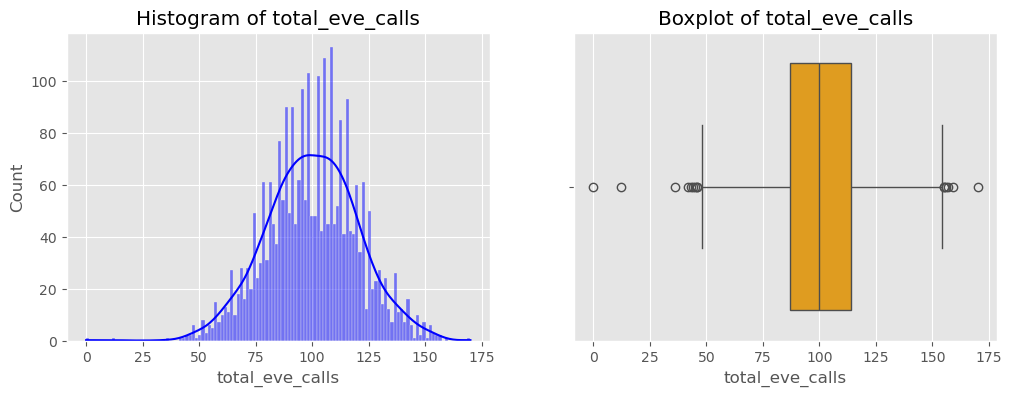

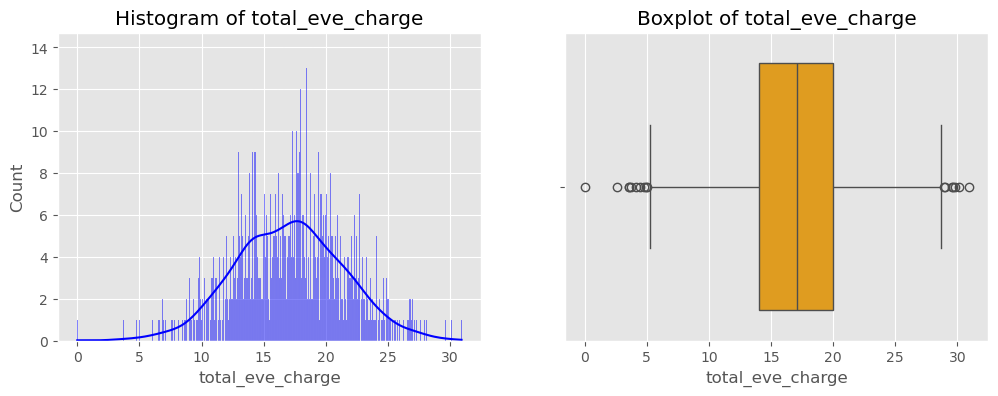

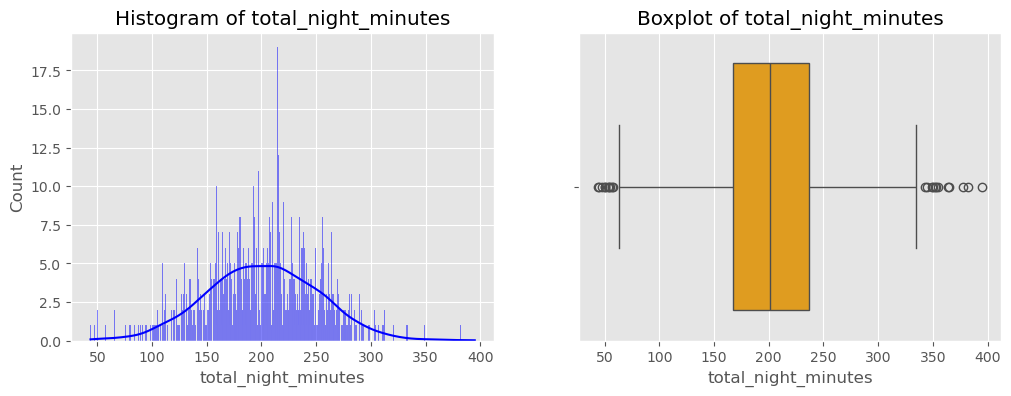

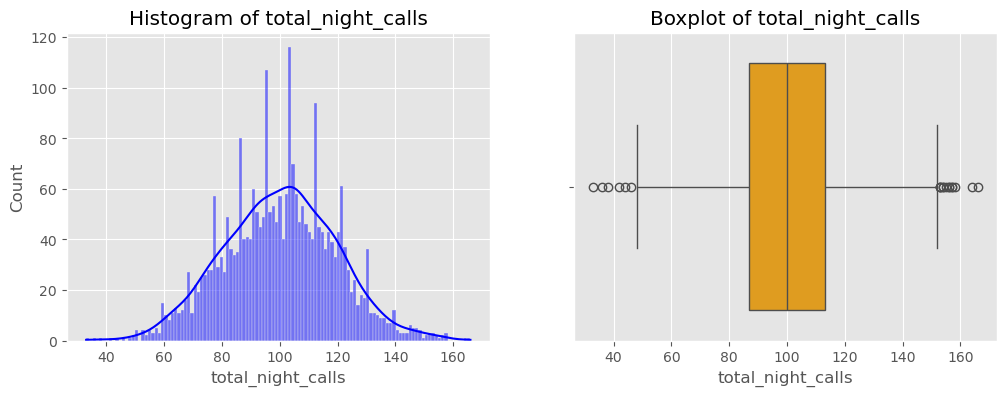

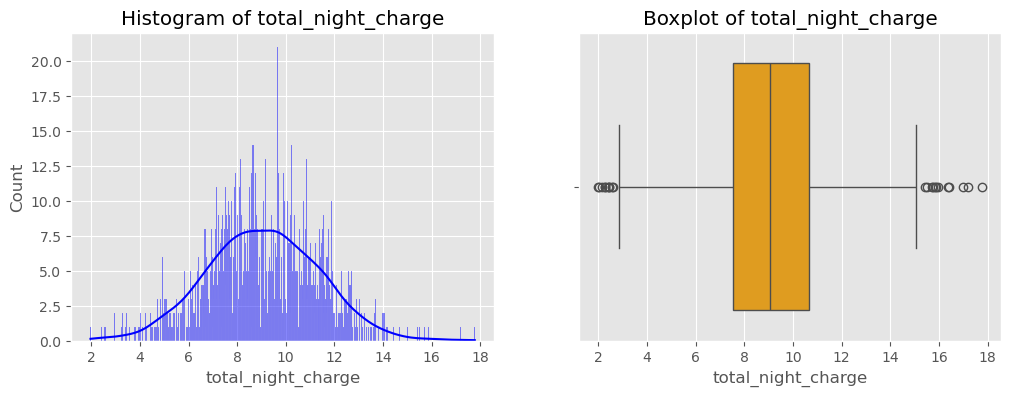

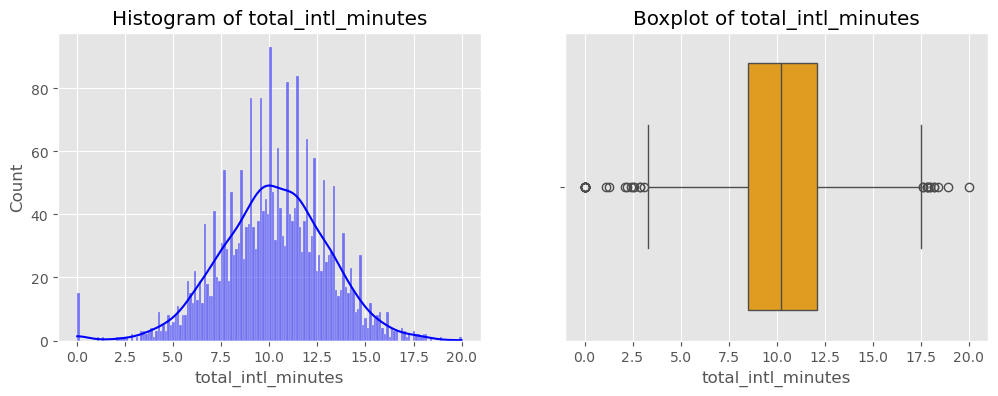

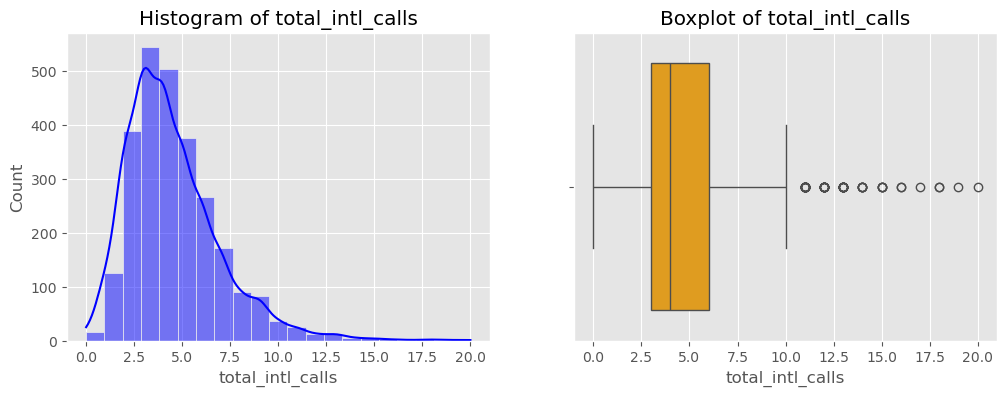

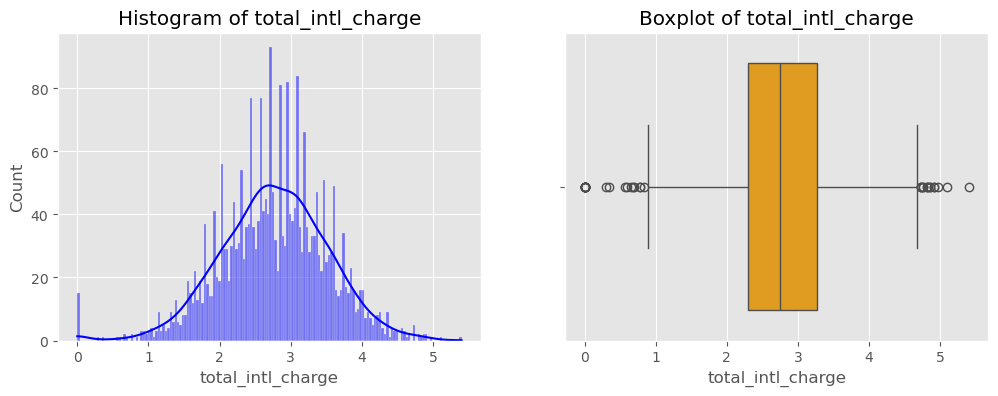

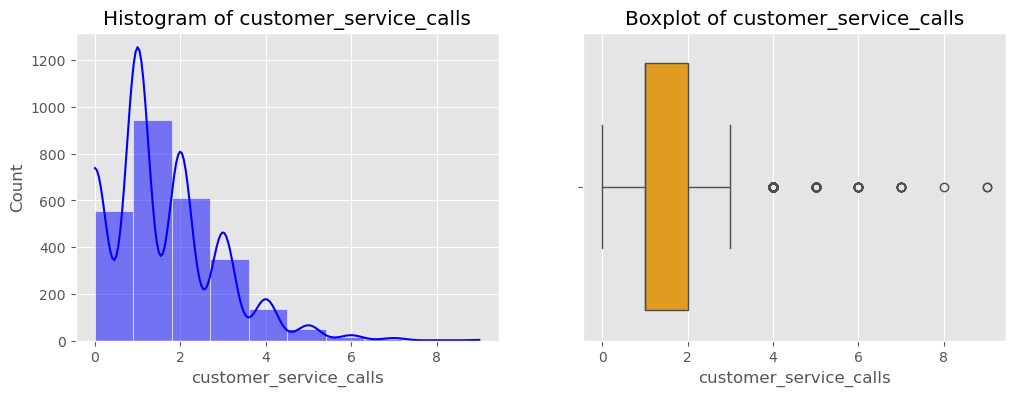

In [30]:
def show_univariate_plots(dataframe):
    ''' to show histograms and boxplots for numeric variables '''
    num_cols = dataframe.select_dtypes(include=['int', 'float']).columns

    for col in num_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Histogram
        sns.histplot(dataframe, x=col, bins=dataframe[col].nunique(), ax=axes[0], kde=True, color='blue')
        axes[0].set_title(f'Histogram of {col}')

        # Boxplot
        sns.boxplot(data=dataframe, x=col, ax=axes[1], color='orange')
        axes[1].set_title(f'Boxplot of {col}')

        plt.show()
        
show_univariate_plots(df_train)

**Analysis of Numeric Columns**

- Account Length: The distribution seems roughly normal, centered around 100 days. There are a few outlies on the positive end.
- Number of Voice Mail Messages: Many customers have zero voice mail messages, and the distribution is right-skewed. There are a few outliers with a very high number of messages.
- Total Day Minutes: The distribution appears normal. There are a few outliers on both the lower and upper ends.
- Total Day Calls: This variable also shows a roughly normal distribution with a few outliers.
- Total Day Charges: The distribution and outliers look very similar to the total day minutes, which would be expected.
- Total Eve Minutes, Total Night Minutes: Both show normal distributions similar to 'Total Day Minutes', with some outliers.
- Total International Calls: Most customers made approximately 3 calls.  The distribution is slightly right-skewed.
- Total Intl Minutes: The distribution is roughly normal, with some outliers on the higher end.
- Customer Service Calls: Most customers made only a few calls to customer service, with the distribution being right-skewed. There are outliers with a high number of customer service calls.

### Categorical Columns

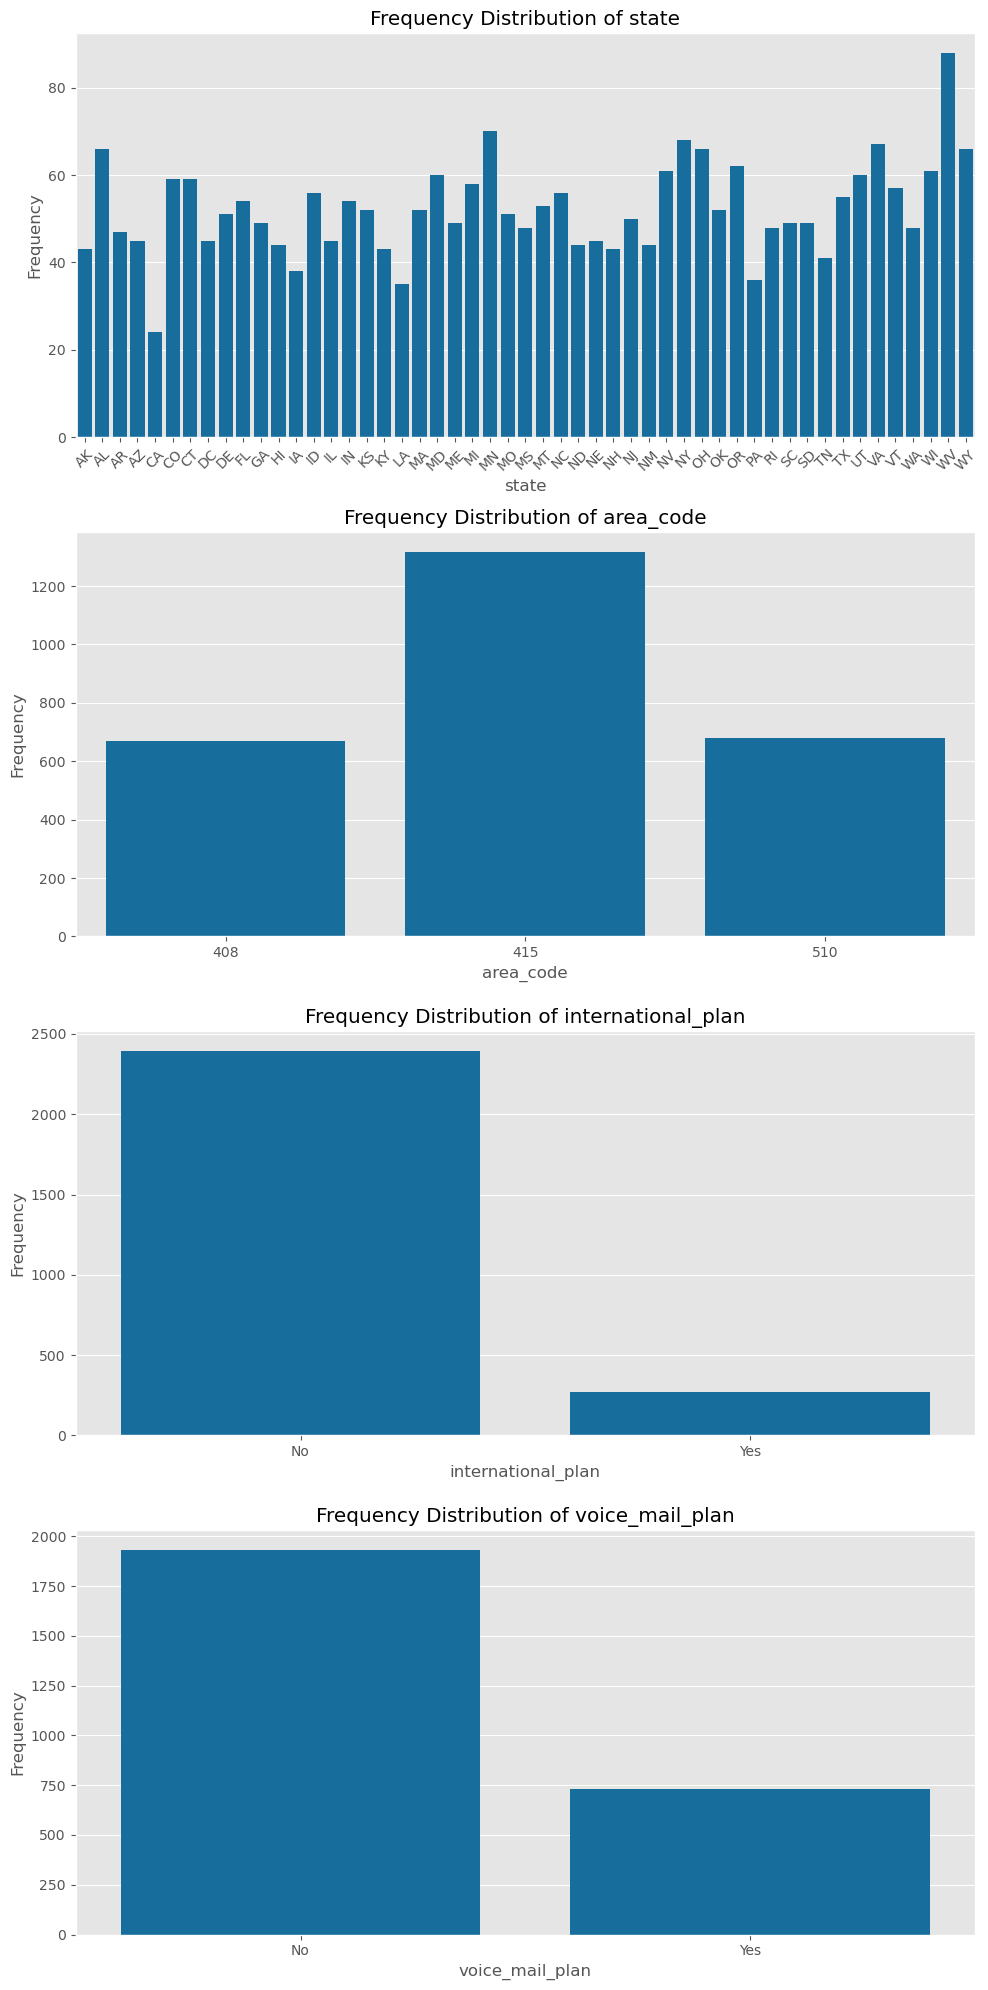

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusting the dataset and column names for the univariate analysis of categorical variables
cat_vars_updated = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

# Creating subplots for the categorical variables
fig, axes = plt.subplots(nrows=len(cat_vars_updated), ncols=1, figsize=(10, 20), tight_layout=True)

# Plotting bar plots for each categorical variable
for i, var in enumerate(cat_vars_updated):
    # Sort the value counts alphabetically by index (which are your categorical labels)
    data_count = df_train[var].value_counts().sort_index()
    sns.barplot(x=data_count.index, y=data_count.values, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of {var}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(var)

    # Rotating x-axis labels for clarity, if necessary (more than 10 bars)
    if len(data_count.index) > 10:
        for label in axes[i].get_xticklabels():
            label.set_rotation(45)

plt.show()


**Analysis of Categorical Data Frequencies**

- State: The distribution across states is shown, with the number of customers in each state varying slightly, but overall quite balanced.
- Area Code: This plot shows the frequency of each area code in the dataset.  408 and 510 are about equal, with about twice as many calls from the 415 area code.
- International Plan: The majority of customers do not have an international plan.
- Voice Mail Plan: Similar to the International Plan, most customers do not have a voice mail plan.

## Bivariate Analysis

### Correlation Analysis

In [37]:
# Convert target variable to binary to check correlations and prepare for modeling
df_train['churn'] = df_train['churn'].map({False: 0, True: 1})
df_test['churn'] = df_test['churn'].map({False: 0, True: 1})

# check correlations with target and other variables
corr_matrix = df_train.select_dtypes(include=['number'])
corr_matrix = corr_matrix.reset_index(drop=True)

heat = corr_matrix.corr()
heat

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.000000,-0.008620,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
area_code,-0.008620,1.000000,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019
number_vmail_messages,-0.002996,-0.000584,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
total_day_minutes,0.002847,-0.023134,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
total_day_calls,0.038862,-0.009629,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
total_day_charge,0.002843,-0.023130,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
total_eve_minutes,-0.015923,0.000679,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
total_eve_calls,0.018552,-0.018602,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539
total_eve_charge,-0.015909,0.000707,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196,0.072893
total_night_minutes,-0.008994,-0.003353,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236,0.033639


In [38]:
# Update seaborn to 0.13.0 to fix heatmap error of only showing values for first line

# pip install seaborn==0.13.0
print(sns.__version__)

0.13.0


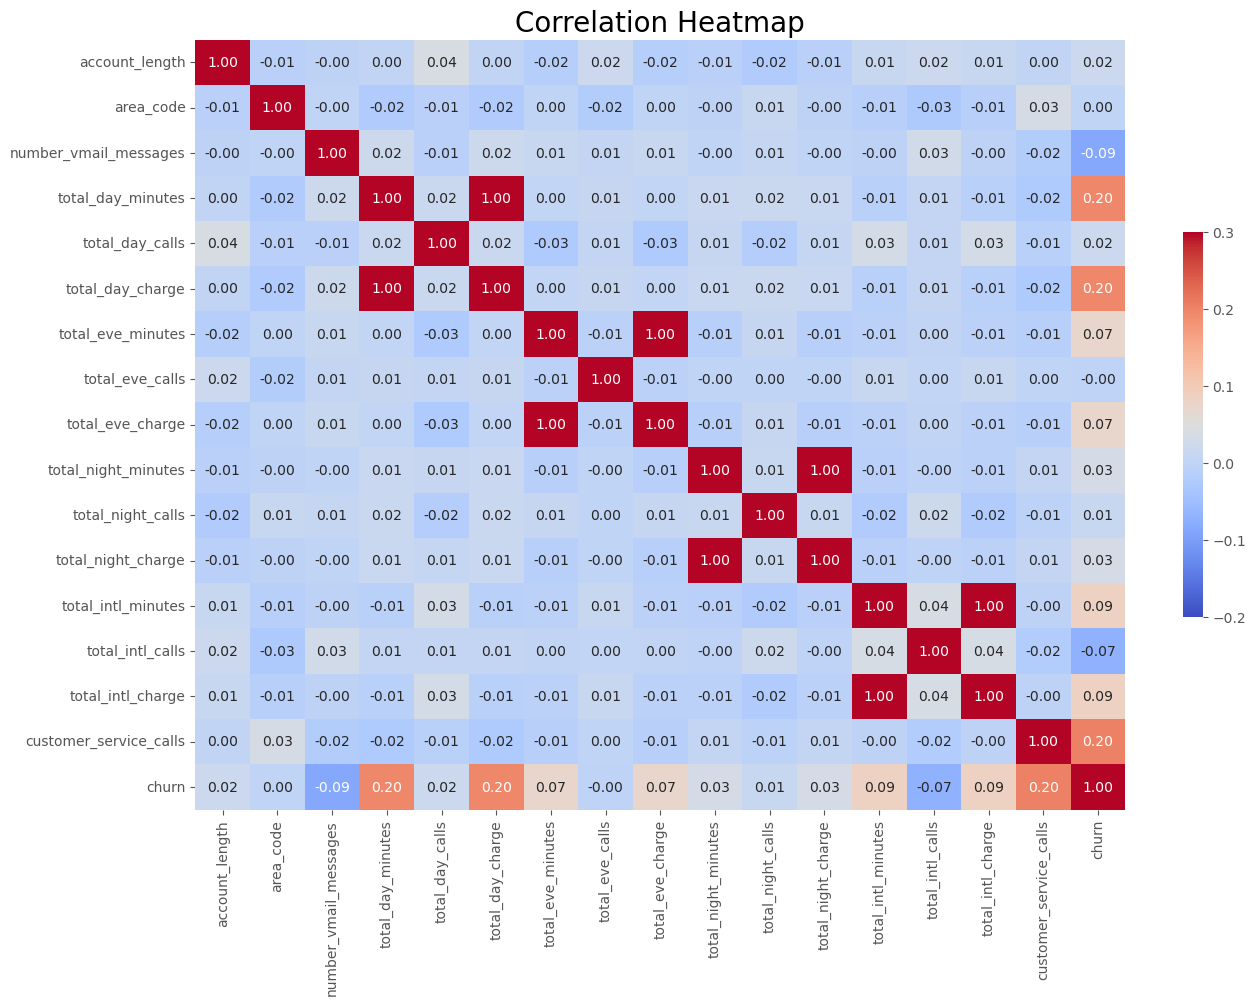

In [39]:
# Create heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heat, cmap='coolwarm', vmin=-.2, vmax=.3, annot=True, fmt='.2f', cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', size=20)

plt.show()

**Correlation Heatmap Results**

There is close to a 1 to 1 correlation between variables, such as total_day_charge and total_day_minutes (same with evening, night and international). As a result, I am planning to use Random Forest and Gradient Boosting models, which are not negatively impacted by multicollinearity. These models can handle correlated features without affecting model performance.  Also, each variable might contain unique information. Removing one of two correlated variables can sometimes lead to a loss of valuable information.  Thus these variabes will be retained.

Besides these reduandant features, there are no significant correlations between any of the feature variables; there are some small correlations with the target variable (such as total day minutes and customer service calls).


### Key Numeric Features

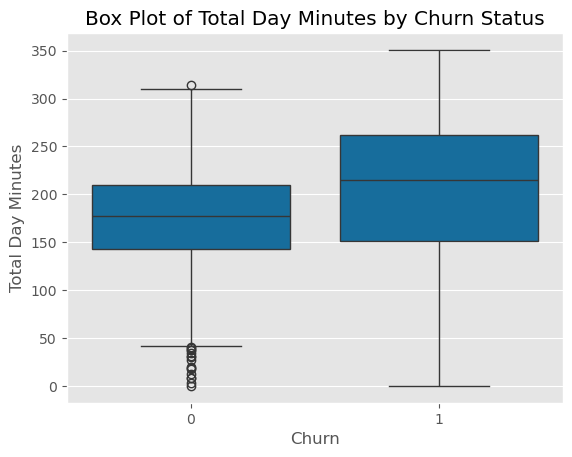

In [42]:
# Create boxplot of total day minutes vs churn
sns.boxplot(x='churn', y='total_day_minutes', data=df_train)
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.title('Box Plot of Total Day Minutes by Churn Status')
plt.show()


**Total Day Minutes by Churn Status**

- Customers who churned tend to use more total day minutes on average than those who did not churn.
- The non-churn group shows a wider range of lower minute usage, including several significant outliers.
- The churn group has a higher median usage, indicating that higher usage may be associated with a higher likelihood of churn.
- Variability in day minutes seems to be higher for the churn group and the non-churn group has a significant number of outliers.

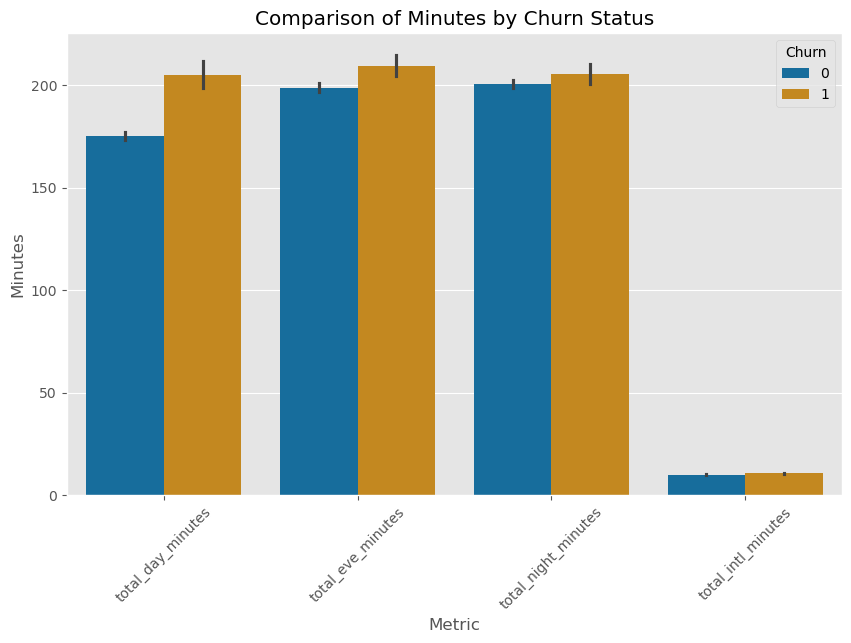

In [44]:
# Minutes comparison
minute_metrics = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']
df_minutes = df_train.melt(id_vars='churn', value_vars=minute_metrics, var_name='Metric', value_name='Minutes')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_minutes, x='Metric', y='Minutes', hue='churn')
plt.xlabel('Metric')
plt.ylabel('Minutes')
plt.title('Comparison of Minutes by Churn Status')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()


**Minutes by Churn Status**

- For all categories, churned customers (Churn 1) have higher average usage compared to non-churned customers (Churn 0). 
- The trend is consistent across different times of day and for international usage.

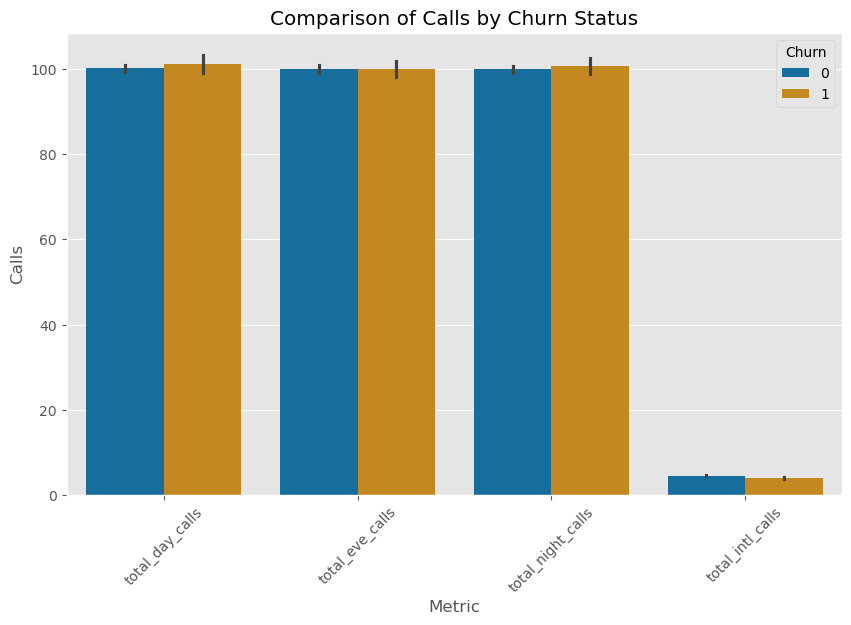

In [46]:
# Calls comparison
call_metrics = ['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls']
df_calls = df_train.melt(id_vars='churn', value_vars=call_metrics, var_name='Metric', value_name='Calls')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_calls, x='Metric', y='Calls', hue='churn')
plt.xlabel('Metric')
plt.ylabel('Calls')
plt.title('Comparison of Calls by Churn Status')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()


**Calls by Churn Status**

- The number of calls made by churned customers is roughly similar to those made by non-churned customers for all categories. 
- There isn't a noticeable difference in the frequency of calls based on churn status.

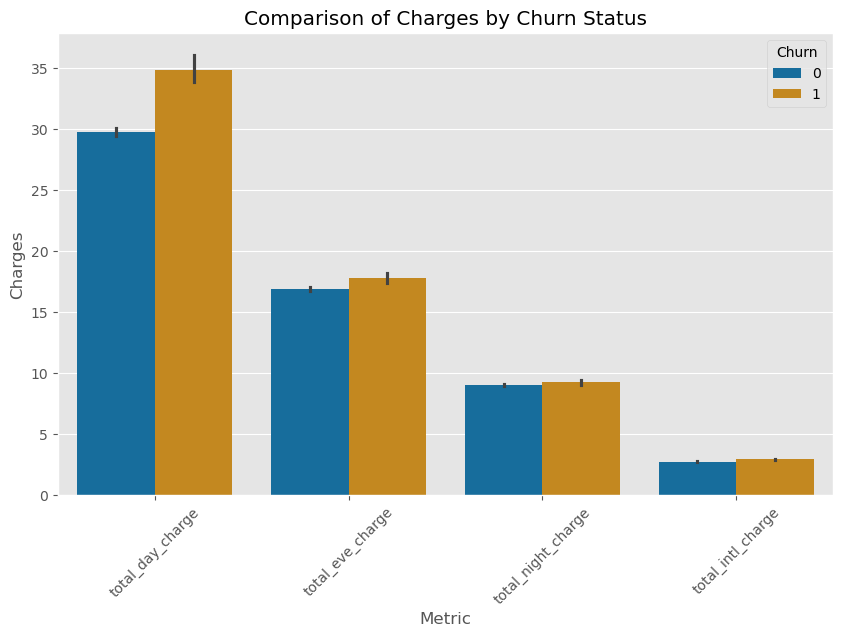

In [48]:
# Charges comparison
charge_metrics = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
df_charges = df_train.melt(id_vars='churn', value_vars=charge_metrics, var_name='Metric', value_name='Charges')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_charges, x='Metric', y='Charges', hue='churn')
plt.xlabel('Metric')
plt.ylabel('Charges')
plt.title('Comparison of Charges by Churn Status')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.show()

**Charges by Churn Status**

- Churned customers incur higher charges during day, evening, and night. 
- For international charges, churned customers also show a tendency towards higher charges, although the difference is less pronounced than for domestic charges.

**Overall Trends**

- Higher Service Utilization and Charges in Churned Customers: Churned customers tend to use more minutes and incur higher charges both domestically and internationally. This indicates that higher service usage, rather than the number of interactions (calls), may be associated with churn risk.
- Similar Call Frequencies: The frequency of calls is similar between churned and non-churned customers, suggesting that churn risk may not be directly related to how often customers call.
- International Usage: Churned customers' international usage in terms of minutes and charges is on par or slightly higher than non-churned customers, indicating that the quality or value of the international service could be a churn driver rather than the cost or amount of use.


### Key Categorical Features

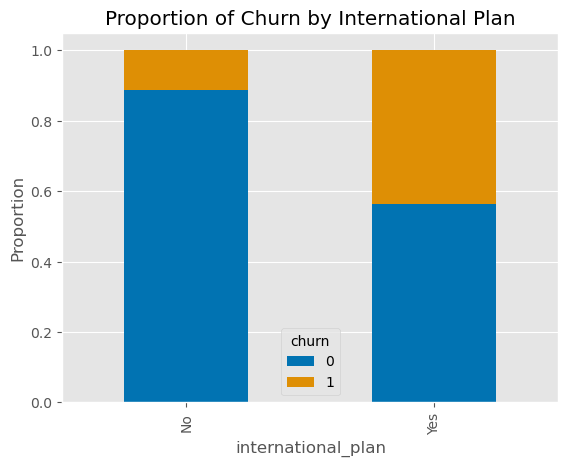

In [52]:
# Bivariate analysis: Categorical vs Categorical (International Plan vs Churn)
# Calculating the proportions for a better comparison
churn_by_international_plan = pd.crosstab(df_train['international_plan'], df_train['churn'], normalize='index')
churn_by_international_plan.plot(kind='bar', stacked=True)
plt.title("Proportion of Churn by International Plan")
plt.ylabel("Proportion")
plt.show()


**Churn by International Plan**

- The stacked bar chart illustrates the proportion of churned and non-churned customers within each category of the international_plan.
- There's a noticeable difference in churn rates between customers with and without an international plan. A higher proportion of customers with an international plan tend to churn, which could indicate customer dissatisfaction with the international plan.

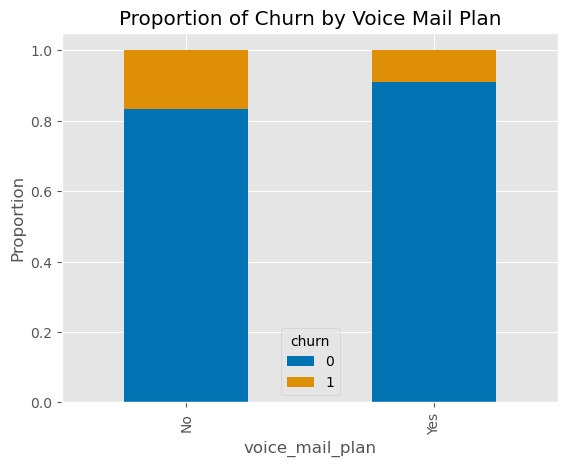

In [54]:
# Bivariate analysis: Categorical vs Categorical (Voice Mail Plan vs Churn)
churn_by_voice_mail_plan = pd.crosstab(df_train['voice_mail_plan'], df_train['churn'], normalize='index')
churn_by_voice_mail_plan.plot(kind='bar', stacked=True)
plt.title("Proportion of Churn by Voice Mail Plan")
plt.ylabel("Proportion")
plt.show()


**Churn by Voice Mail Plan**
- The stacked bar chart shows the proportion of churned and non-churned customers relative to whether they have a voice mail plan.
- Interestingly, the proportion of churn appears to be lower among customers with a voice mail plan compared to those without.

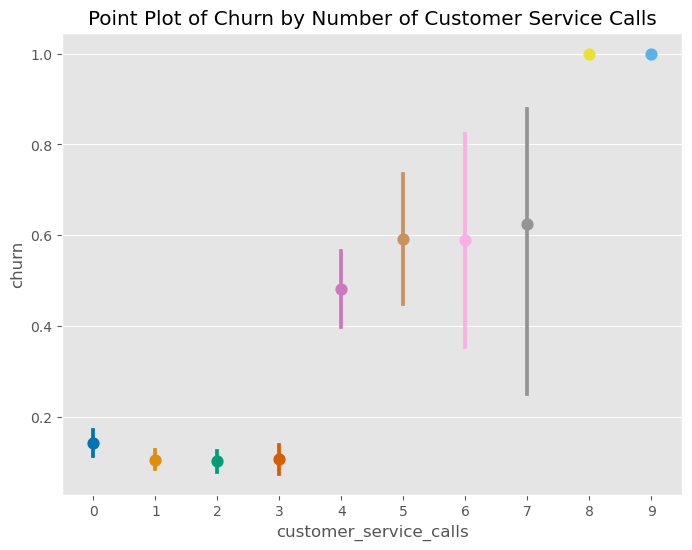

In [56]:
# Numerical vs Categorical (Customer Service Calls vs Churn)
plt.figure(figsize=(8, 6))
sns.pointplot(y='churn', x='customer_service_calls', data=df_train, palette="colorblind")
plt.title('Point Plot of Churn by Number of Customer Service Calls')
plt.show()

**Churn by Number of Customer Service Call**

- The churn rate generally increases with the number of customer service calls.
- The churn rate is about the same for 0-3 service calls, then jumps dramitically when going from 3 to 4, and 7 to 8 service calls.  Callers with 8 or more service calls have an extremely high churn rate.
- For certain numbers (noticeably from 4-7), the confidence intervals are quite large, indicating a higher degree of uncertainty.


# Feature Engineering

I explored various combinations of feature columns to enhance model performance. Key initiatives included:

- Interaction Term: Created an interaction feature between 'total_day_minutes' and 'international_plan' to examine the combined effect on churn.
- Total Minutes Aggregation: Summed up the total minutes across different times of the day (day, evening, night, international) to capture overall service usage.
- Average Call Charges: Calculated average call charges for different timeframes, providing insights into customer spending behav

These feature engineering efforts were integral to my comprehensive analysis, aimed at uncovering potential hidden relationships within the data. Although the engineered features did not significantly enhance the overall model performance, this exploration was vital for a thorough understanding of the dataset.  Detailed code and iterations have been omitted foir clarity and conciseness.


# Data Preprocessing

In [61]:
# Convert 'international_plan' and 'voice_mail plan to one-hot encoded format
df_train = pd.get_dummies(df_train, columns=['international_plan', 'voice_mail_plan'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['international_plan', 'voice_mail_plan'], drop_first=True)

# Encode other categorical variables
label_encoders = {}
for column in ['state', 'area_code']:
    label_encoders[column] = LabelEncoder()
    df_train[column] = label_encoders[column].fit_transform(df_train[column])
    df_test[column] = label_encoders[column].transform(df_test[column])

# Split the data into features and target
X_train = df_train.drop('churn', axis=1)
y_train = df_train['churn']
X_test = df_test.drop('churn', axis=1)
y_test = df_test['churn']

# Apply Robust Scaling
scaler = RobustScaler()
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])


**Robust Scaling**

Due to the large number of ouliers discovered during EDA, I chose to apply robust scaling when preprocessing the data. Robust scaling reduces the influence of outliers in the data since it uses the median and the interquartile range (IQR) for scaling. These are less sensitive to outliers than the mean and variance used in standard scaling.  In many real-world scenarios, outliers can contain important information. Robust scaling allows you to retain these data points without letting them dominate the feature scaling.

# Modeling

## Model Selection

**Random Forest Classifier**

I selected the Random Forest model for its robustness in tackling complex predictive tasks like customer churn. Its key advantages include:
- Handling Imbalanced Data: This model excels in scenarios where the class distribution is uneven, as in our case where non-churning customers significantly outnumber those who churn. Random Forest mitigates imbalance by averaging decisions from multiple trees, leading to more reliable predictions.
- Feature Importance Analysis: It efficiently identifies critical features influencing churn, providing valuable insights for formulating retention strategies.
- Capturing Interaction Effects: Random Forest inherently captures complex interactions between features, an important factor in churn prediction, without the need for extensive feature engineering.

**Gradient Boosting Machine (GBM) Classifier**

As a complementary model, I chose the Gradient Boosting Machine for its nuanced approach to error correction:
- Sequential Error Correction: GBMs sequentially build trees, with each new tree focusing on correcting the errors of its predecessors. This aspect is particularly beneficial in accurately identifying subtle patterns and reducing false negatives in churn prediction.
- Model Performance Validation: By contrasting GBMs with Random Forests, we can validate the churn prediction model more thoroughly. This comparison leverages the strengths of both methodologies, ensuring robust performance and deeper feature insights.
- Complex Pattern Recognition: GBMs are adept at uncovering complex, non-linear patterns that might be missed by other models, making them an excellent choice for comprehensive churn analysis.

Together, these models provide a balanced approach to our analysis, enhancing the reliability and interpretability of our churn predictions.



## Random Forest Model

In [68]:
# Define stratified k-fold for both models
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


**Stratified K-Fold**

I chose to use a stratified k-fold cross-validation as it is great for handling unbalanced datasets, like those commonly found in churn prediction, as it ensures that each fold of the dataset has the same proportion of class labels as the original dataset.  In our unbalanced dataset, where the churn of the "False" class significantly outnumbers the "True" class, regular k-fold cross-validation might result in folds that do not contain any instances of the minority class. Stratified k-fold maintains the class distribution in each fold, ensuring that each fold is representative of the overall population.  Also, without stratification, it’s possible to have training folds that are biased towards the majority class, leading to a model that does not perform well on the minority class. Stratified k-fold helps to reduce this bias by preserving the original class ratio within each fold.  By ensuring that each fold has a proportionate representation of the classes, stratified k-fold provides a more accurate estimate of model performance, especially for the minority class which is of greater interest in our churn prediction.

In [70]:
# Define the weight ratios for RF model

# Generate a range of weight ratios for the minority class (churned = True)
weight_ratios = np.linspace(0.1, 15.0, 50)

# Create a list of dictionaries for class_weight
class_weight_options = [{0: 1, 1: ratio} for ratio in weight_ratios]


**Weight Ratios**

In addition to the stratified k-fold cross-validation, using weight ratios in a Random Forest model for customer churn is particularly beneficial when dealing with imbalanced datasets, where the number of churned customers is significantly lower than the number of retained customers. Weight ratios can help correct the class imbalance by assigning a higher weight to the minority class (churned customers). This tells the model that errors in predicting the minority class are more costly than errors in predicting the majority class.  By giving more weight to the minority class, the model will focus more on correctly predicting those cases, potentially increasing the recall. This is important in churn prediction because failing to identify a customer at risk of churn could be more costly than incorrectly identifying a satisfied customer as at risk.


In [72]:
# Set up parameter grid for Randomized Search
param_dist = {
    'n_estimators': np.linspace(100, 1000, 10, dtype=int),  
    'max_depth': np.linspace(10, 100, 10, dtype=int),      
    'min_samples_split': np.linspace(2, 10, 5, dtype=int), 
    'min_samples_leaf': np.linspace(1, 5, 5, dtype=int),      
    'bootstrap': [True, False],       
    'max_features': ['sqrt', 'log2'],
    'class_weight': class_weight_options
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist, 
    n_iter=100,  
    scoring='recall',  # Focusing on recall
    cv=stratified_kfold,       
    verbose=2, 
    random_state=42,
    n_jobs=-1
)

# Perform random search
random_search.fit(X_train_scaled, y_train)

# Best parameters and best recall score
best_params = random_search.best_params_
best_recall = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Recall Score:", best_recall)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': {0: 1, 1: 10.742857142857142}, 'bootstrap': True}
Best Recall Score: 0.8041625041625041


**Hyperparameter Tuning with Focus on Recall**

I experimentd with numerous hyperparameters (param_dist) to find the one's that produced the best results.  Since recall measures the model's ability to identify all actual positives, a high recall means the model is good at identifying customers who will churn.  Since I'm considering recall to be of the most importance in a customer churn model, I have set the scoring to recall, so that the random search maximizes these results.  

In [74]:
# Train the Random Forest model with the best parameters found
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Predict probabilities for randaom forest model
y_pred_rf = best_rf_model.predict_proba(X_test_scaled)


In [75]:
# Evaluate model fucnction - metics
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    return {"Recall": recall, "Precision": precision, "F1 Score": f1, "Accuracy": accuracy}


In [76]:
# Print RF metrics
# Evaluate the model using the evaluate_model function
metrics_rf = evaluate_model(best_rf_model, X_test_scaled, y_test)
print(metrics_rf)


{'Recall': 0.8210526315789474, 'Precision': 0.8041237113402062, 'F1 Score': 0.8125, 'Accuracy': 0.9460269865067467}


## Gradient Boosting Machine (GBM)

In [78]:
# Parameter grid for Randomized Search
param_dist_gb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 20),
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Subsampling the training set to help with imbalance
    'max_features': ['sqrt', 'log2', None]
}

# Randomized Search
random_search_gb = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist_gb, 
    n_iter=100, 
    scoring='recall', 
    cv=stratified_kfold,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit and determine best parameters
random_search_gb.fit(X_train_scaled, y_train)
best_params_gb = random_search_gb.best_params_
best_recall_gb = random_search_gb.best_score_

print("Best Parameters:", best_params_gb)
print("Best Recall Score:", best_recall_gb)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.1}
Best Recall Score: 0.7654678654678655


**Subsampling**

In addition to stratified k-fold cross-validation (as with the Random Forest model),  I used subsampling when tuning the GBM model as it is particularly advantageous for imbalanced datasets, such as the churn dataset we are using. In an imbalanced dataset, the minority class is often the one of greater interest (e.g., the customers who churn). By using subsampling, we ensure that within each iteration, the minority class has a better chance to influence the model because each tree gets a more balanced view of the classes.

Also, when the model is exposed to various subsampled datasets that have a higher presence of the minority class, it can learn patterns that are more specific to predicting churn, which might be missed if the model were overwhelmingly trained on the majority class.

In [80]:
# Train and predict with the best parameters
best_gb_model = GradientBoostingClassifier(**best_params_gb, random_state=42)
best_gb_model.fit(X_train_scaled, y_train)
best_predictions = best_gb_model.predict(X_test_scaled)

y_pred_gb = best_gb_model.predict_proba(X_test_scaled)


In [81]:
# Print GB metrics
# Evaluate the model using the evaluate_model function
metrics_gb = evaluate_model(best_gb_model, X_test_scaled, y_test)
print(metrics_gb)

{'Recall': 0.7368421052631579, 'Precision': 0.8974358974358975, 'F1 Score': 0.8092485549132948, 'Accuracy': 0.9505247376311844}


## Model Comparison

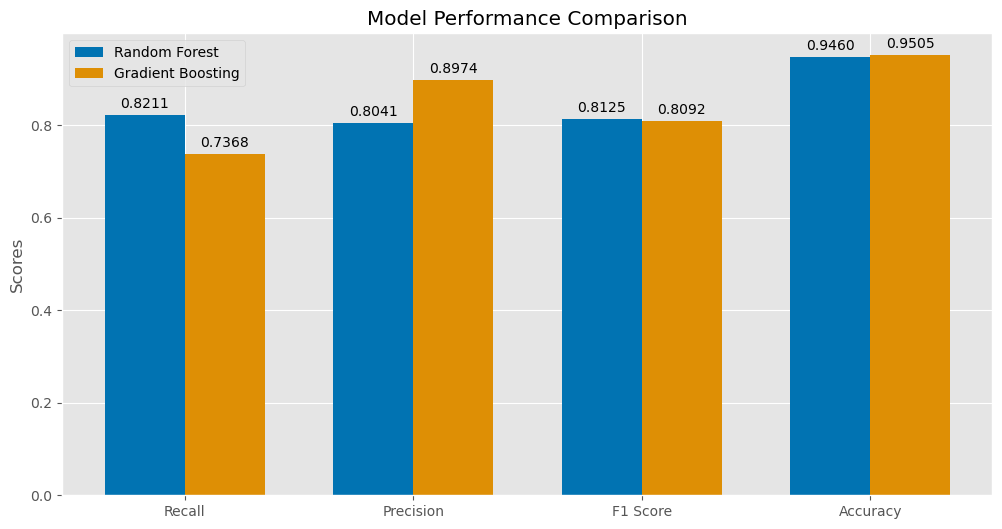

In [150]:
# Data for plotting
labels = list(metrics_rf.keys())
rf_values = list(metrics_rf.values())
gb_values = list(metrics_gb.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, rf_values, width, label='Random Forest')
rects2 = ax.bar(x + width/2, gb_values, width, label='Gradient Boosting')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(loc='best')


# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


**Metrics Comparison**

The metrics in the above bar chart are crucial for evaluating the performance of classification models, especially in applications like customer churn prediction where both identifying churners (recall) and being correct in the prediction (precision) are important. Here's the analysis of the results:

- Recall (crucial for churn): The recall of the Random Forest model is 0.8211. It identifies approximately 82.11% of all true churn cases.
The Gradient Boosting model's recall is 0.7368, identifying approximately 73.68% of all true churn cases.
- Precision: The precision of the Random Forest model is 0.8974, indicating that when it predicts churn, it is correct about 89.74% of the time.
The Gradient Boosting model's precision is 0.8041, meaning it is correct about 80.41% of the time when predicting churn.
- F1 Score: The F1 Score for the Random Forest model is 0.8125, showing a balance between precision and recall, with a lean towards recall.
The F1 Score for the Gradient Boosting model is 0.8092.
- Accuracy: The Random Forest model has an accuracy of 0.9460. While high, accuracy is less informative for imbalanced datasets.
The Gradient Boosting model has a slightly higher accuracy of 0.9505.



**Summary**

- Random Forest: This model is preferable for churn prediction, with a higher recall of 0.8211. It is more adept at identifying customers who are at risk of churning, which is essential for targeting retention strategies effectively.
- Gradient Boosting: Although this model has a high overall accuracy, its recall of 0.7368 is lower compared to Random Forest. This lower recall could result in more missed opportunities to identify and retain customers likely to churn.

When prioritizing churn prediction, the Random Forest model stands out due to its higher recall, meaning it is less likely to overlook actual churn cases. This capability is critical for businesses that aim to proactively manage and prevent customer churn.


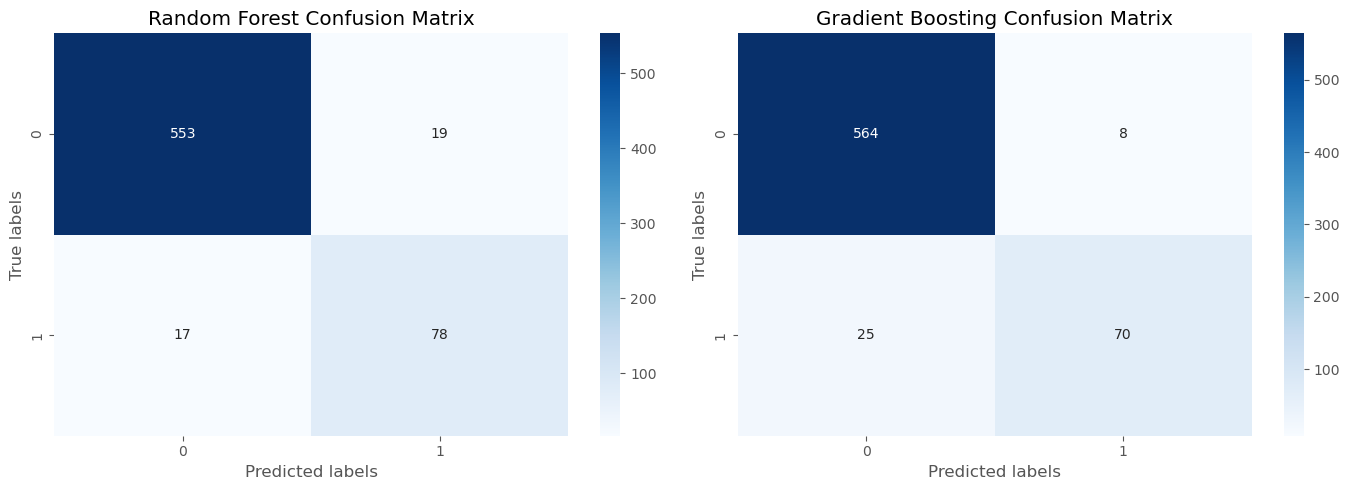

In [85]:
# Confusion Matrix

# Predictions from Random Forest model
rf_predictions = best_rf_model.predict(X_test_scaled)

# Predictions from Gradient Boosting model
gb_predictions = best_gb_model.predict(X_test_scaled)

# Creating confusion matrices for both models
cm_rf = confusion_matrix(y_test, rf_predictions)
cm_gb = confusion_matrix(y_test, gb_predictions)

# Setting up the matplotlib figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting confusion matrix for Random Forest model
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

# Plotting confusion matrix for Gradient Boosting model
sns.heatmap(cm_gb, annot=True, fmt="d", cmap='Blues', ax=axes[1])
axes[1].set_title('Gradient Boosting Confusion Matrix')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

# Adjust layout for readability
plt.tight_layout()

# Show the plots side by side
plt.show()



**Comparison of Confusion Matrix Results**
    
- True Negatives (Non-churn correctly identified): Gradient Boosting identified more true negatives than Random Forest, suggesting it is more conservative about labeling a customer as churn.
- False Positives (Type I Error): Gradient Boosting has fewer false positives than Random Forest, indicating it is more precise in predicting non-churning customers.
- False Negatives (Type II Error): Random Forest has fewer false negatives than Gradient Boosting. This is important in churn prediction because it means Random Forest is less likely to miss identifying customers who will churn (higher recall).
- True Positives (Churn correctly identified): Random Forest identified more true positives than Gradient Boosting, again pointing towards a higher recall.

**Business Implications**

For churn prediction, the ability to correctly identify churn (recall) is often considered more important than precision, as failing to identify a customer who is likely to churn can be costlier to the business than incorrectly predicting churn for a customer who does not. In this comparison
- The Random Forest model has a higher recall, with 78 true positives versus 70 for Gradient Boosting. This indicates that Random Forest is the better model for identifying churned customers.
- However, the Gradient Boosting model has better performance in terms of precision (fewer false positives) and accurately identifying non-churning customers (higher true negatives).

Since the goal of this project is to minimize missed churn opportunities, the Random Forest model's higher number of true positives (TP) and lower number of false negatives (FN) may be the better model despite Gradient Boosting's slightly better precision and true negative rate. 

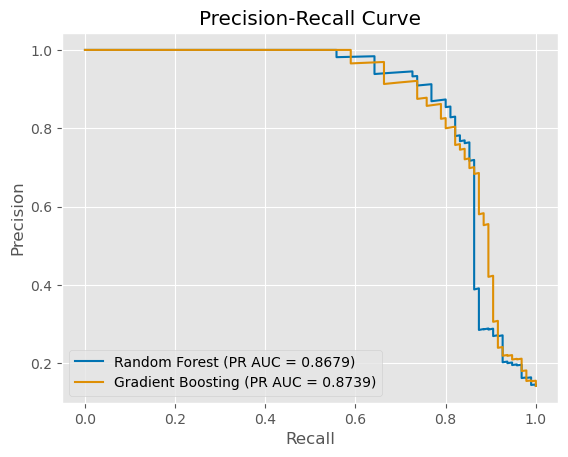

In [87]:
# Precision-Recall AUC Curve for both models
y_score_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_score_rf)
auc_rf = auc(recall_rf, precision_rf)

y_score_gb = best_gb_model.predict_proba(X_test_scaled)[:, 1]
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_score_gb)
auc_gb = auc(recall_gb, precision_gb)

# Plot Precision-Recall curves
plt.figure()
plt.plot(recall_rf, precision_rf, label=f'Random Forest (PR AUC = {auc_rf:.4f})')
plt.plot(recall_gb, precision_gb, label=f'Gradient Boosting (PR AUC = {auc_gb:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Precision-Recall Curve Comparison
- **Focus on Recall**: Due to the high cost of missing a customer who might churn (false negative), the analysis centers on recall while also considering precision.
- **PR AUC Scores**:
  - The Random Forest model shows a PR AUC of 0.8679.
  - The Gradient Boosting model has a marginally better PR AUC of 0.8739, indicating slightly superior aggregation of precision and recall.
- **Curve Behavior**:
  - Both models start with high precision at lower recall levels, which is expected behavior.
  - As recall increases, precision decreases for both models, showing the typical trade-off when trying to capture more true positives.
- **Model Comparison**:
  - The Gradient Boosting model generally maintains higher precision across most recall values compared to Random Forest.
  - The models intersect at several points, suggesting the trade-off between precision and recall shifts at different thresholds.
- **Strategic Threshold Selection**:
  - Depending on the threshold chosen, Random Forest may offer higher recall, or Gradient Boosting may provide better overall balance.
  - The decision on the optimal model and threshold should align with business objectives, weighing the costs of false positives against false negatives.

Gradient Boosting might be the preferred choice for balancing recall and precision, given its performance across most recall values. The final selection should consider the specific business context and the implications of incorrect predictions on customer retention strategies.



## Feature Importances

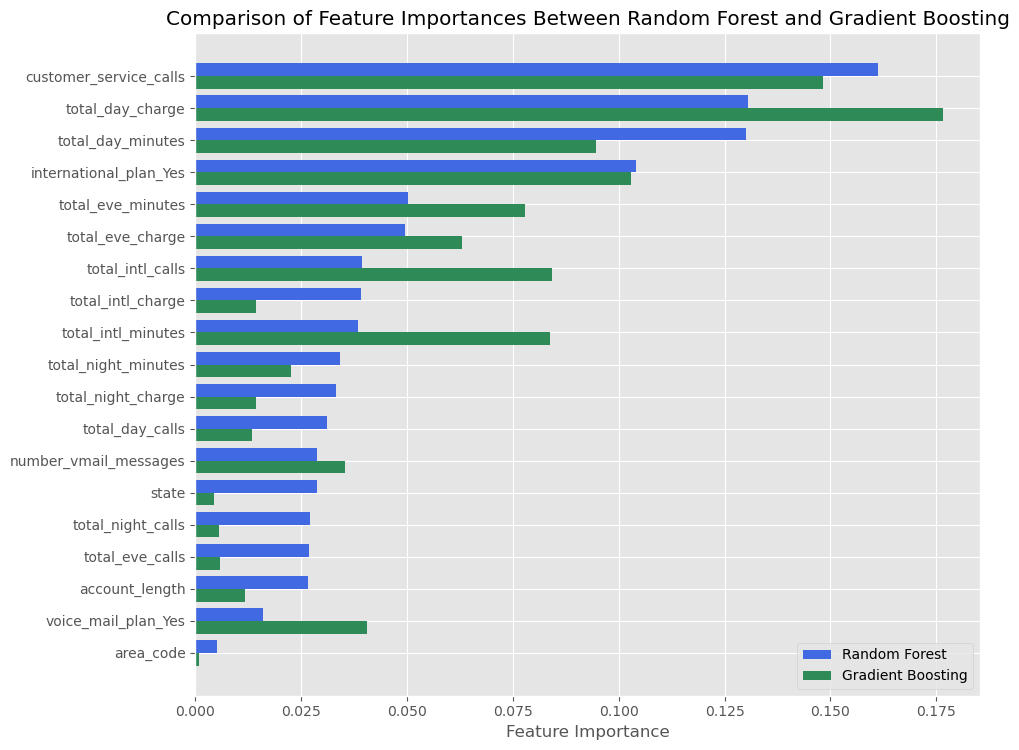

In [90]:
# Get feature importances
rf_importances = best_rf_model.feature_importances_
gb_importances = best_gb_model.feature_importances_

# Create a DataFrame for feature importances
feature_names = X_train.columns
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest': rf_importances,
    'Gradient Boosting': gb_importances
})

# Sort by the Random Forest importances for consistent ordering
importances_df.sort_values('Random Forest', ascending=True, inplace=True)

# Plotting the horizontal bar chart with increased vertical size
fig, ax = plt.subplots(figsize=(10, len(feature_names) * 0.4))  # Adjust the multiplier for vertical size

# Get the y-location for each algorithm's set of features
y_locs_rf = np.arange(len(feature_names)) + 0.2  # RF bars above
y_locs_gb = np.arange(len(feature_names)) - 0.2  # GB bars below

# Plot the Random Forest importances
ax.barh(y_locs_rf, importances_df['Random Forest'], height=0.4, label='Random Forest', color='royalblue')

# Plot the Gradient Boosting importances
ax.barh(y_locs_gb, importances_df['Gradient Boosting'], height=0.4, label='Gradient Boosting', color='seagreen')

# Add the feature names on the y-axis
ax.set_yticks(np.arange(len(feature_names)))
ax.set_yticklabels(importances_df['Feature'])

# Add labels and title
ax.set_xlabel('Feature Importance')
ax.set_title('Comparison of Feature Importances Between Random Forest and Gradient Boosting')
ax.legend()

plt.tight_layout()
plt.show()


**Comparison of Feature Importances**

- Customer Service Calls: For the Random Forest model, customer_service_calls ranks as the top predictor, suggesting that the quality and frequency of customer service interactions are pivotal in predicting churn. Gradient Boosting also finds this feature important but less so than total_day_charge.
- Total Day Charge: The Gradient Boosting assigns the highest importance to total_day_charge, which indicates that the charges for daytime calls are a key indicator of churn within this model. This feature still retains substantial importance in the Random Forest model but is not the top predictor.
- International Plan: The Gradient Boosting model appears to put more weight on whether a customer has an international plan (international_plan_Yes) than the Random Forest model. This indicates a potential correlation between having an international plan and the likelihood of churning, which is more pronounced in the Gradient Boosting model's analysis.
- Evening and International Charges and Minutes: These features show a greater importance in the Gradient Boosting model compared to Random Forest, implying a more fine-grained consideration of call charges and durations outside of standard daytime hours.
- Total Calls (Day, Eve, Night, International): The Random Forest model treats these features with a more uniform level of importance across different times of the day, whereas the Gradient Boosting model differentiates more significantly between them, assigning varying levels of importance to calls made at different times.
- Lesser Important Features: Features such as state, area_code, account_length, and voice_mail_plan_Yes demonstrate relatively low importance for predicting churn in both models, though they are still part of the overall feature set considered by both algorithms.

In essence, while both models share some common ground regarding the influential features for predicting churn, they differ in how they rank the importance of these features. This could influence how one might interpret the data and make decisions based on the model outputs. 

**Recommended Strategies**

- Customer Service Calls: High numbers of service calls may indicate customer dissatisfaction or issues with the service. The focus should be on improving the quality of customer support. Implement follow-up procedures to ensure that problems are fully resolved. 
- Total Day Minutes and Total Day Charge: Since total day minutes and charges are the most important per the Gradient Boosting model, the business may want to consider offering more personalized or flexible pricing plans that cater to customers' usage patterns. This could include tiered pricing or pay-as-you-go options.  In addition, introducing discounts or special offers that reward high usage may encourage customer loyalty as they appear more financially apprealing.
- International Plan: Since having an international plan is also a strong churn predictor, it may be helfpul to review the business's international plan offerings, as they may be uncompetitive or unsatisfactory. Offering more attractive international rates or bundled international minutes could retain customers looking to use international services.


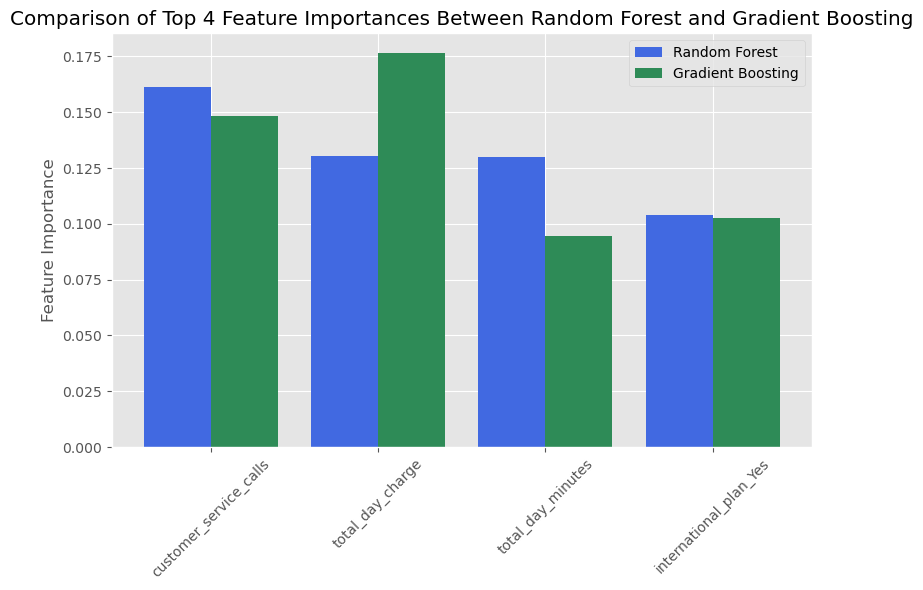

In [147]:
# Sort by the Random Forest importances for consistent ordering and select the top 4
importances_df.sort_values('Random Forest', ascending=False, inplace=True)
top_importances_df = importances_df.head(4)

# Plotting the vertical bar chart with adjusted horizontal size for top 4 features
fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted figure size for better layout

# Get the x-location for each algorithm's set of features
x_locs_rf = np.arange(len(top_importances_df)) - 0.2  # RF bars left
x_locs_gb = np.arange(len(top_importances_df)) + 0.2  # GB bars right

# Plot the Random Forest importances
ax.bar(x_locs_rf, top_importances_df['Random Forest'], width=0.4, label='Random Forest', color='royalblue')

# Plot the Gradient Boosting importances
ax.bar(x_locs_gb, top_importances_df['Gradient Boosting'], width=0.4, label='Gradient Boosting', color='seagreen')

# Add the feature names on the x-axis
ax.set_xticks(np.arange(len(top_importances_df)))
ax.set_xticklabels(top_importances_df['Feature'], rotation=45)  # Rotate labels for better readability

# Add labels and title
ax.set_ylabel('Feature Importance')
ax.set_title('Comparison of Top 4 Feature Importances Between Random Forest and Gradient Boosting')
ax.legend()

plt.tight_layout()
plt.show()

